# Section 4.2: Time to revert

This is a data analysis script used to produce findings in the paper, which you can run based entirely off the files in this GitHub repository. 

This entire notebook can be run from the beginning with Kernel -> Restart & Run All in the menu bar. It takes about 2 minutes to run on a laptop running a Core i5-2540M processor.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime.now()

## Load data

In [3]:
!unxz -kf ../../datasets/parsed_dataframes/df_all_2016.pickle.xz

In [4]:
!ls ../../datasets/parsed_dataframes/*

../../datasets/parsed_dataframes/df_all_2016.pickle
../../datasets/parsed_dataframes/df_all_2016.pickle.xz


In [5]:
with open("../../datasets/parsed_dataframes/df_all_2016.pickle", "rb") as f:
    df_all = pickle.load(f)

### Any negative time to revert values?

In [6]:
df_all.query("time_to_revert_days < 0").groupby("language")['time_to_revert_days'].count()

Series([], Name: time_to_revert_days, dtype: int64)

## Descriptive statistics for time to revert
### Descriptive statistics for time to revert in days, across all languages, articles only

In [7]:
df_all.query("page_namespace == 0")['time_to_revert_days'].describe()

count    561936.000000
mean        237.645457
std         411.595084
min           0.000012
25%           6.082454
50%          61.933466
75%         289.782436
max        4823.938021
Name: time_to_revert_days, dtype: float64

### Descriptive statistics for time to revert in days, by language, articles only

In [8]:
ns0_gb_language = df_all.query("page_namespace == 0").groupby("language")
ns0_gb_language['time_to_revert_days'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
de,54938.0,177.219367,323.367816,0.000012,3.367940,29.779259,210.346296,2812.659664
en,244793.0,355.094704,504.773676,0.000012,16.899039,138.333750,506.773461,4823.938021
es,68099.0,153.518941,287.060992,0.000023,4.496042,47.901678,172.992627,2718.973171
fr,56181.0,121.620191,282.023358,0.000023,2.934815,21.316944,82.405093,2862.087998
ja,34772.0,107.053649,252.744285,0.000231,1.888440,13.191661,79.564262,2850.540775
pt,60124.0,177.575667,338.002085,0.000023,6.571725,56.841302,134.406580,2798.985463
zh,43029.0,120.720974,198.609084,0.000116,4.884954,33.041887,213.728391,2869.869861


### Mean time to revert by languages by year

In [9]:
ns0_gb_language_year = df_all.query("page_namespace == 0").groupby(["language", "reverting_year"])
ns0_gb_language_year['time_to_revert_days'].mean().unstack()

reverting_year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
language,,,,,,,,,,,,,
de,2.437581,28.855724,28.558832,33.218967,50.478627,43.831775,34.720251,38.194312,32.745193,425.013958,265.680970,588.075954,715.966491
en,63.480868,25.859759,40.299529,58.425741,94.761004,163.235266,268.411703,206.503663,233.984229,419.697644,549.862104,642.093301,742.180750
es,NaN,14.931381,28.025336,39.068812,60.031915,33.716371,28.144100,60.045785,75.463717,271.023569,386.191639,602.155278,819.415971
fr,9.640359,12.541849,30.581841,31.957423,45.370803,40.599968,46.552897,57.867140,37.486068,313.290995,649.454563,508.514669,552.050484
ja,5.396280,16.650297,34.843058,20.513915,27.822040,35.431424,37.521447,34.647785,33.117964,376.683202,235.401395,104.429029,98.152000
pt,9.191991,23.780369,41.967216,90.338954,75.424798,126.001256,38.875652,55.937894,47.312297,397.827497,386.471007,524.410205,289.767724
zh,22.467035,57.266240,32.101106,19.854394,43.018599,61.714529,59.993002,46.967085,32.936245,197.100142,225.110042,175.436261,445.105027


### Median time to revert by languages by year

In [10]:
ns0_gb_language_year = df_all.query("page_namespace == 0").groupby(["language", "reverting_year"])
ns0_gb_language_year['time_to_revert_days'].median().unstack()

reverting_year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
language,,,,,,,,,,,,,
de,2.439618,6.311354,12.703090,8.252627,11.214311,14.526528,6.202546,7.732135,5.972309,279.297998,189.250058,575.239363,791.212373
en,63.480868,10.168513,12.095544,13.318663,26.052465,79.193634,42.580388,37.459572,14.159444,300.279653,266.566950,201.228762,298.773356
es,NaN,5.390694,9.429537,11.184734,14.064867,6.995683,2.036887,61.646007,7.451910,175.852917,234.889444,325.515509,473.861169
fr,9.640359,5.506470,13.408519,7.887407,12.352766,10.870451,8.908362,20.019815,6.189792,150.262350,629.622998,43.618079,167.325457
ja,3.662130,9.422280,17.108843,8.956308,10.870405,8.286950,7.931516,5.906661,6.568229,232.283553,155.465810,28.741464,4.430874
pt,9.191991,5.794606,23.212772,39.109039,16.065278,46.074034,8.320255,60.852969,7.503605,78.069688,273.977500,498.168785,0.717535
zh,14.220000,27.748524,10.899815,7.685845,12.552546,9.607488,8.915816,4.883733,6.289398,174.701632,273.385903,30.850069,303.214566


### Time to revert histogram and Kernel Density Estimate for enwiki, articles only

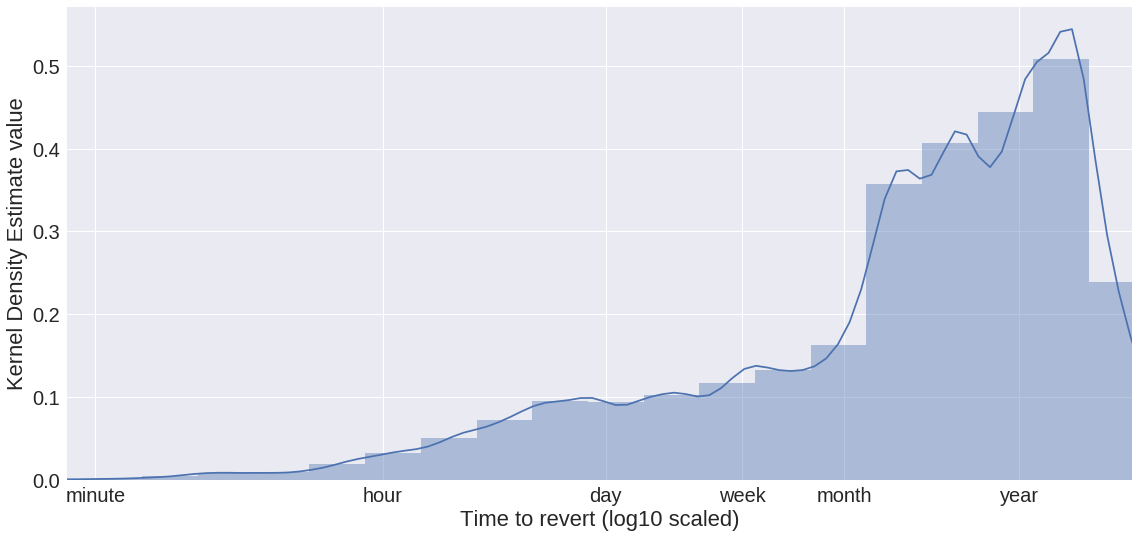

In [11]:
sns.set(font_scale=2)

g = sns.FacetGrid(df_all.query("page_namespace == 0 and language == 'en'"), size=8, aspect=2)
g.map(sns.distplot, "time_to_revert_hrs_log10", bins=25)

g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

g.ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

g.ax.set_ylabel("Kernel Density Estimate value")
g.ax.set_xlabel("Time to revert (log10 scaled)")

### Time to revert histogram and KDE for all languages, articles only, combined plot

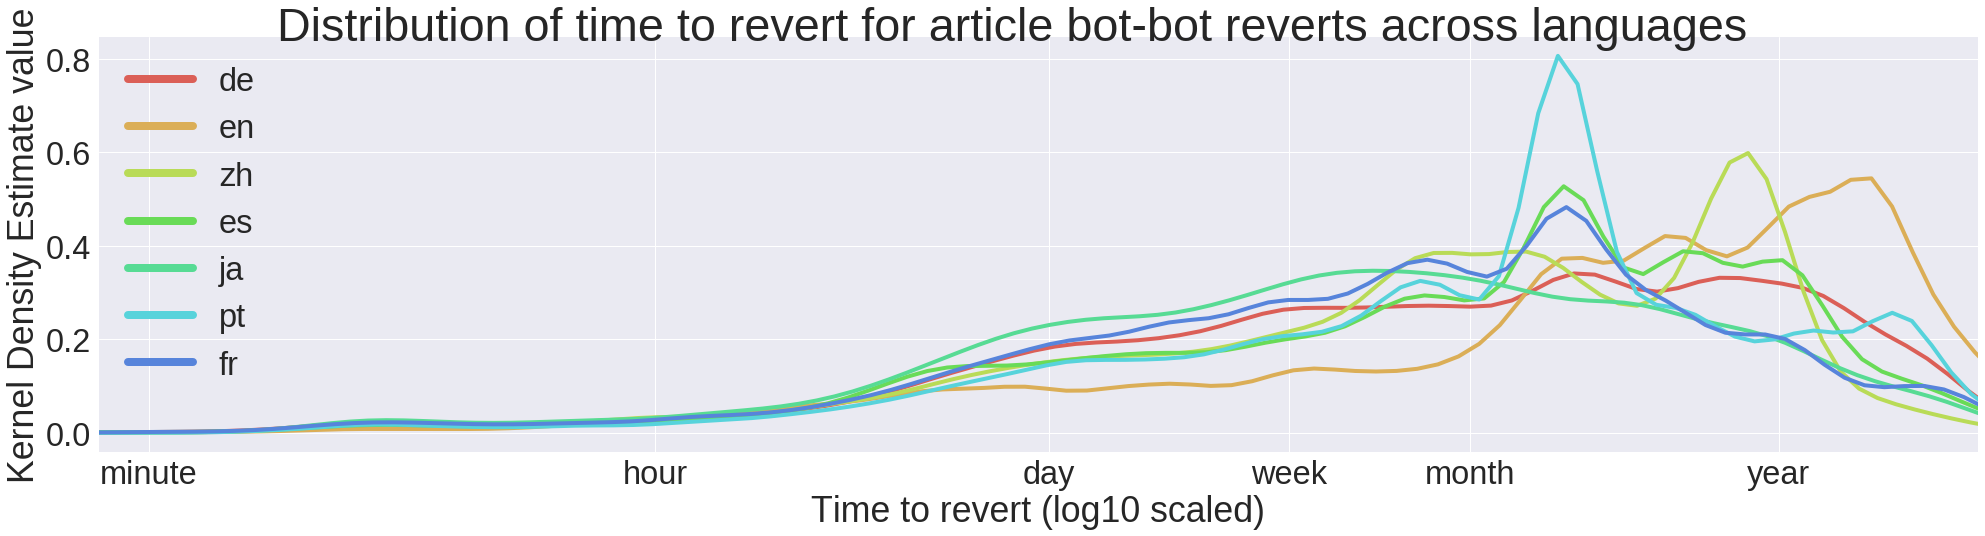

In [12]:
sns.set(font_scale=3.25, rc={'lines.linewidth': 4})
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0"), palette=pal, hue="language", size=8, aspect=3.5)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

g.ax.set_ylabel("Kernel Density Estimate value")
g.ax.set_xlabel("Time to revert (log10 scaled)")
plt.suptitle("Distribution of time to revert for article bot-bot reverts across languages")

g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

### Time to revert histogram and KDE for all languages, articles only, paneled plot

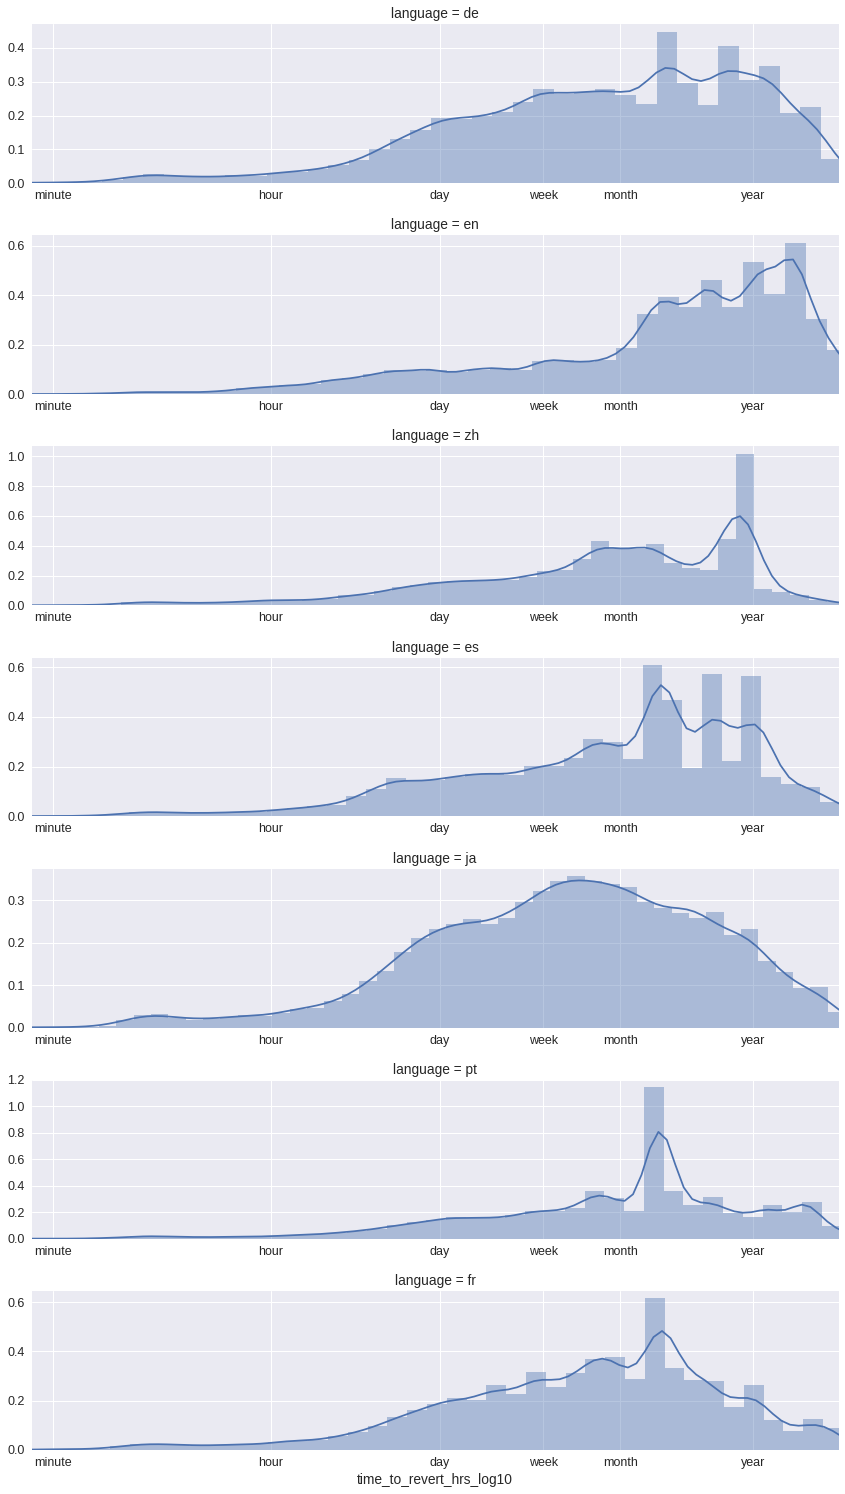

In [13]:
sns.set(font_scale=1.25)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, row="language", size=3, aspect=4, sharex=False, sharey=False)
g.map(sns.distplot, "time_to_revert_hrs_log10")

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlim(np.log10(1/90), np.log10(24*365*5))
    

### Mean days to revert by language and reverting year (articles only, 95% CI bars)

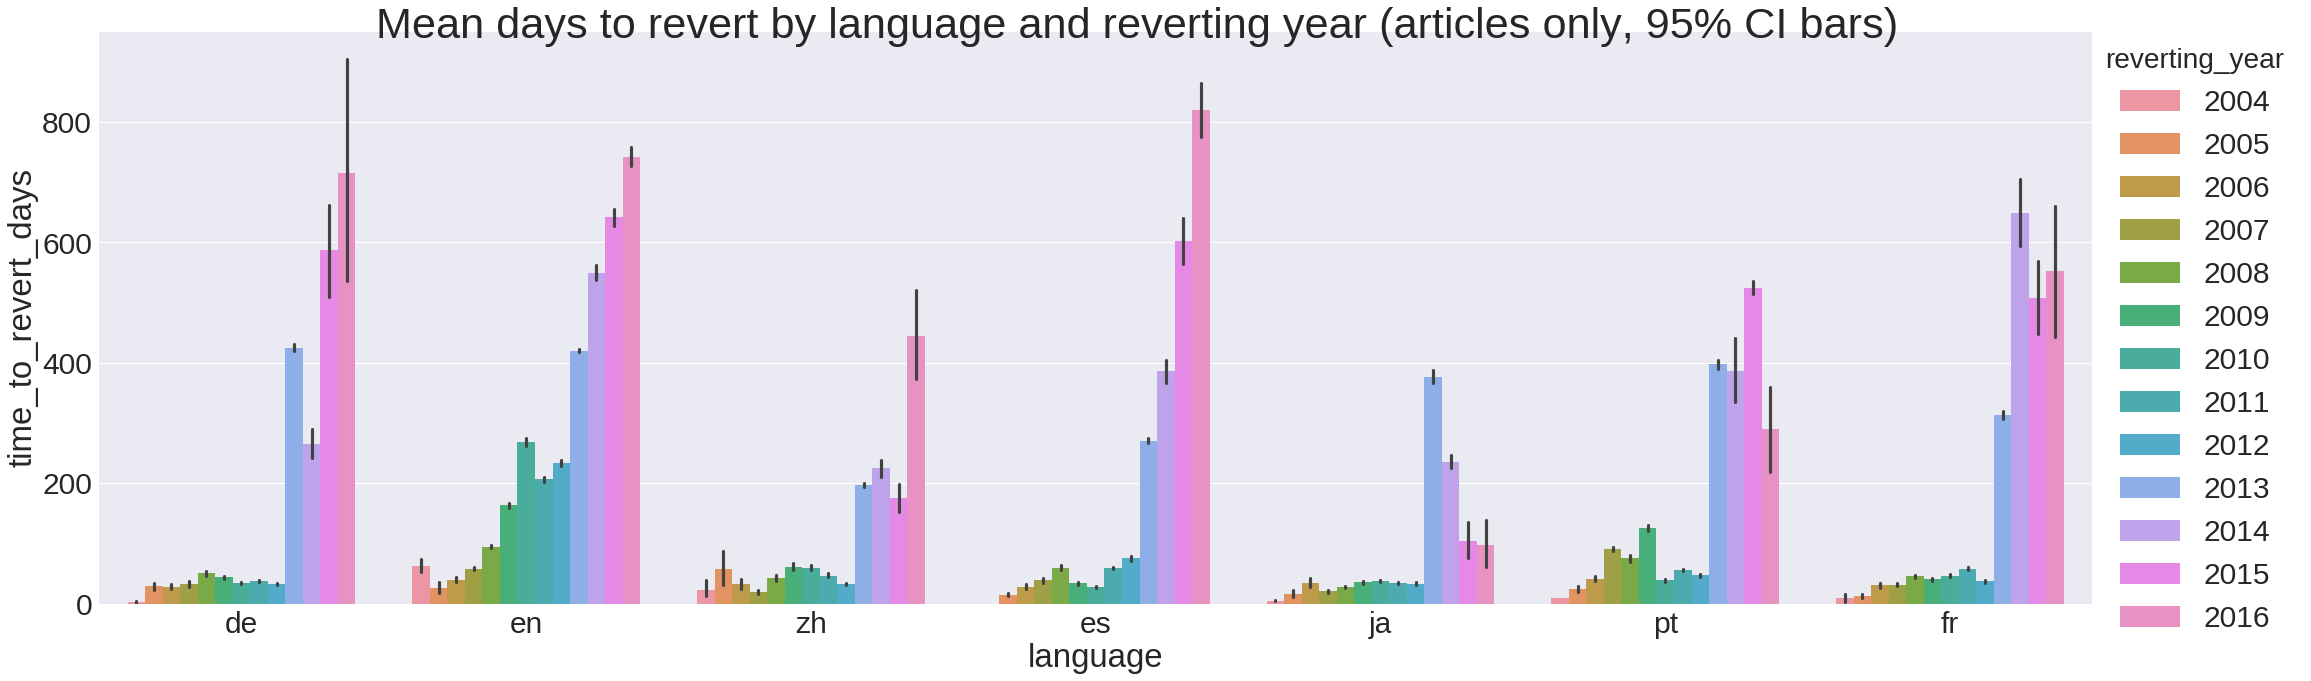

In [14]:
sns.set(font_scale=3)

g = sns.factorplot(data=df_all[df_all['page_namespace']==0],
                   x='language',
                   y='time_to_revert_days',
                   hue='reverting_year',
                   kind='bar',
                   size=10,
                   aspect = 3)

plt.suptitle("Mean days to revert by language and reverting year (articles only, 95% CI bars)")

### Median days to revert by language and reverting year (articles only, 95% CI bars)

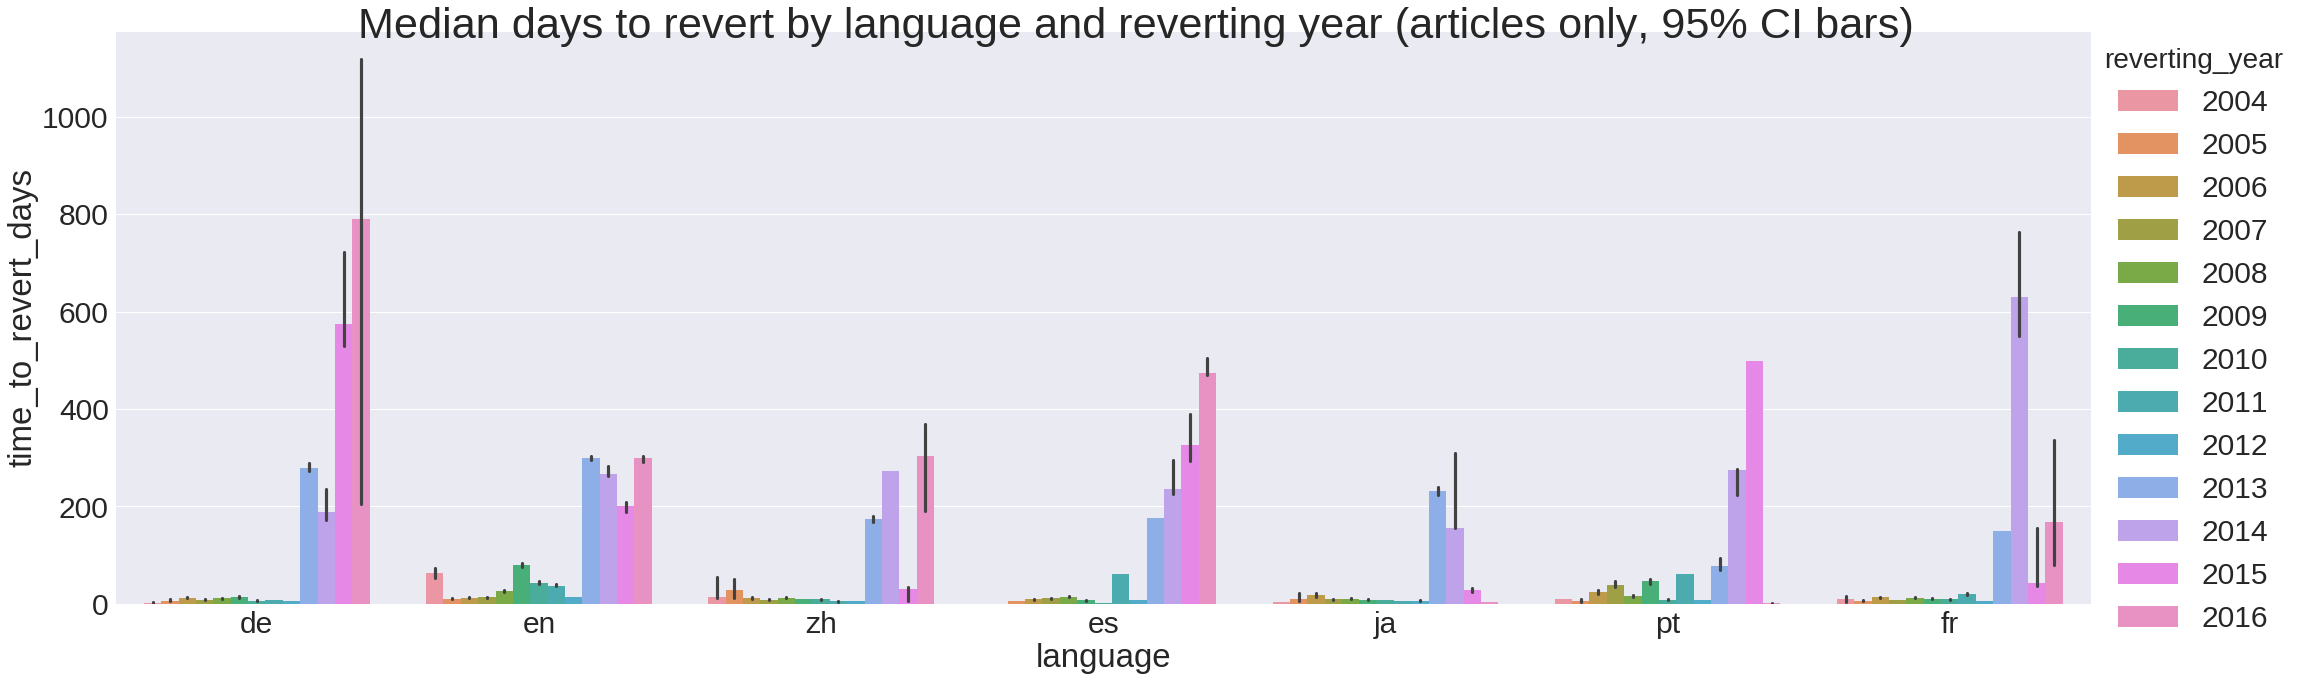

In [15]:
sns.set(font_scale=3)

g = sns.factorplot(data=df_all[df_all['page_namespace']==0],
                   x='language',
                   y='time_to_revert_days',
                   hue='reverting_year',
                   kind='bar',
                   estimator=np.median,                   
                   size=10,
                   aspect = 3)

plt.suptitle("Median days to revert by language and reverting year (articles only, 95% CI bars)")

### Runtime

In [16]:
end = datetime.datetime.now()

time_to_run = end - start
minutes = int(time_to_run.seconds/60)
seconds = time_to_run.seconds % 60
print("Total runtime: ", minutes, "minutes, ", seconds, "seconds")

Total runtime:  2 minutes,  5 seconds
